# IRIS FLOWER CLASSIFICATION

In [1]:
# importing the packages--
import pandas as pd
import numpy as np
import math as m
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report

In [2]:
# reading the data file--
def read_data():
    data=pd.read_csv("C:/ANKITA/INTERNSHIP/CODSOFT/DATA SCIENCE/Assignment 2/IRIS.csv ")
    return data

In [3]:
# calling the function--
data= read_data()
print(data.head(2))

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa


In [4]:
# copying the data--
data.copy()
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
# data analysis--
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
print(data.dtypes)

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [10]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
# checking the missing values--
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
data.shape

(150, 5)

In [13]:
X = data['sepal_length'].values.reshape(-1,1)
print(X)

[[5.1]
 [4.9]
 [4.7]
 [4.6]
 [5. ]
 [5.4]
 [4.6]
 [5. ]
 [4.4]
 [4.9]
 [5.4]
 [4.8]
 [4.8]
 [4.3]
 [5.8]
 [5.7]
 [5.4]
 [5.1]
 [5.7]
 [5.1]
 [5.4]
 [5.1]
 [4.6]
 [5.1]
 [4.8]
 [5. ]
 [5. ]
 [5.2]
 [5.2]
 [4.7]
 [4.8]
 [5.4]
 [5.2]
 [5.5]
 [4.9]
 [5. ]
 [5.5]
 [4.9]
 [4.4]
 [5.1]
 [5. ]
 [4.5]
 [4.4]
 [5. ]
 [5.1]
 [4.8]
 [5.1]
 [4.6]
 [5.3]
 [5. ]
 [7. ]
 [6.4]
 [6.9]
 [5.5]
 [6.5]
 [5.7]
 [6.3]
 [4.9]
 [6.6]
 [5.2]
 [5. ]
 [5.9]
 [6. ]
 [6.1]
 [5.6]
 [6.7]
 [5.6]
 [5.8]
 [6.2]
 [5.6]
 [5.9]
 [6.1]
 [6.3]
 [6.1]
 [6.4]
 [6.6]
 [6.8]
 [6.7]
 [6. ]
 [5.7]
 [5.5]
 [5.5]
 [5.8]
 [6. ]
 [5.4]
 [6. ]
 [6.7]
 [6.3]
 [5.6]
 [5.5]
 [5.5]
 [6.1]
 [5.8]
 [5. ]
 [5.6]
 [5.7]
 [5.7]
 [6.2]
 [5.1]
 [5.7]
 [6.3]
 [5.8]
 [7.1]
 [6.3]
 [6.5]
 [7.6]
 [4.9]
 [7.3]
 [6.7]
 [7.2]
 [6.5]
 [6.4]
 [6.8]
 [5.7]
 [5.8]
 [6.4]
 [6.5]
 [7.7]
 [7.7]
 [6. ]
 [6.9]
 [5.6]
 [7.7]
 [6.3]
 [6.7]
 [7.2]
 [6.2]
 [6.1]
 [6.4]
 [7.2]
 [7.4]
 [7.9]
 [6.4]
 [6.3]
 [6.1]
 [7.7]
 [6.3]
 [6.4]
 [6. ]
 [6.9]
 [6.7]
 [6.9]
 [5.8]

In [14]:
Y = data['sepal_width'].values.reshape(-1,1)
print(Y)

[[3.5]
 [3. ]
 [3.2]
 [3.1]
 [3.6]
 [3.9]
 [3.4]
 [3.4]
 [2.9]
 [3.1]
 [3.7]
 [3.4]
 [3. ]
 [3. ]
 [4. ]
 [4.4]
 [3.9]
 [3.5]
 [3.8]
 [3.8]
 [3.4]
 [3.7]
 [3.6]
 [3.3]
 [3.4]
 [3. ]
 [3.4]
 [3.5]
 [3.4]
 [3.2]
 [3.1]
 [3.4]
 [4.1]
 [4.2]
 [3.1]
 [3.2]
 [3.5]
 [3.1]
 [3. ]
 [3.4]
 [3.5]
 [2.3]
 [3.2]
 [3.5]
 [3.8]
 [3. ]
 [3.8]
 [3.2]
 [3.7]
 [3.3]
 [3.2]
 [3.2]
 [3.1]
 [2.3]
 [2.8]
 [2.8]
 [3.3]
 [2.4]
 [2.9]
 [2.7]
 [2. ]
 [3. ]
 [2.2]
 [2.9]
 [2.9]
 [3.1]
 [3. ]
 [2.7]
 [2.2]
 [2.5]
 [3.2]
 [2.8]
 [2.5]
 [2.8]
 [2.9]
 [3. ]
 [2.8]
 [3. ]
 [2.9]
 [2.6]
 [2.4]
 [2.4]
 [2.7]
 [2.7]
 [3. ]
 [3.4]
 [3.1]
 [2.3]
 [3. ]
 [2.5]
 [2.6]
 [3. ]
 [2.6]
 [2.3]
 [2.7]
 [3. ]
 [2.9]
 [2.9]
 [2.5]
 [2.8]
 [3.3]
 [2.7]
 [3. ]
 [2.9]
 [3. ]
 [3. ]
 [2.5]
 [2.9]
 [2.5]
 [3.6]
 [3.2]
 [2.7]
 [3. ]
 [2.5]
 [2.8]
 [3.2]
 [3. ]
 [3.8]
 [2.6]
 [2.2]
 [3.2]
 [2.8]
 [2.8]
 [2.7]
 [3.3]
 [3.2]
 [2.8]
 [3. ]
 [2.8]
 [3. ]
 [2.8]
 [3.8]
 [2.8]
 [2.8]
 [2.6]
 [3. ]
 [3.4]
 [3.1]
 [3. ]
 [3.1]
 [3.1]
 [3.1]
 [2.7]

In [15]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


# Exploratory Data Analysis

<Axes: >

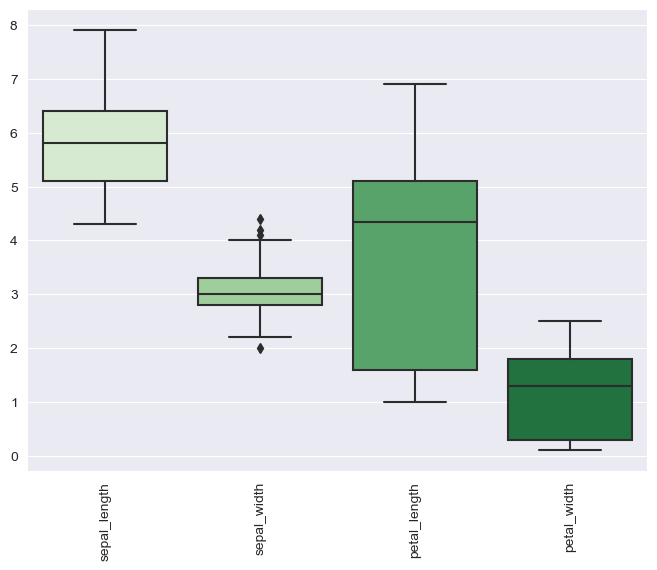

In [16]:
# checking the outliers--
sns.set_style("darkgrid")
plt.figure(figsize=(8,6))
plt.xticks(rotation=90,fontsize="medium")
sns.boxplot(data=data.loc[:, ['sepal_length','sepal_width','petal_length','petal_width','species']],palette="Greens")

<Axes: ylabel='sepal_length'>

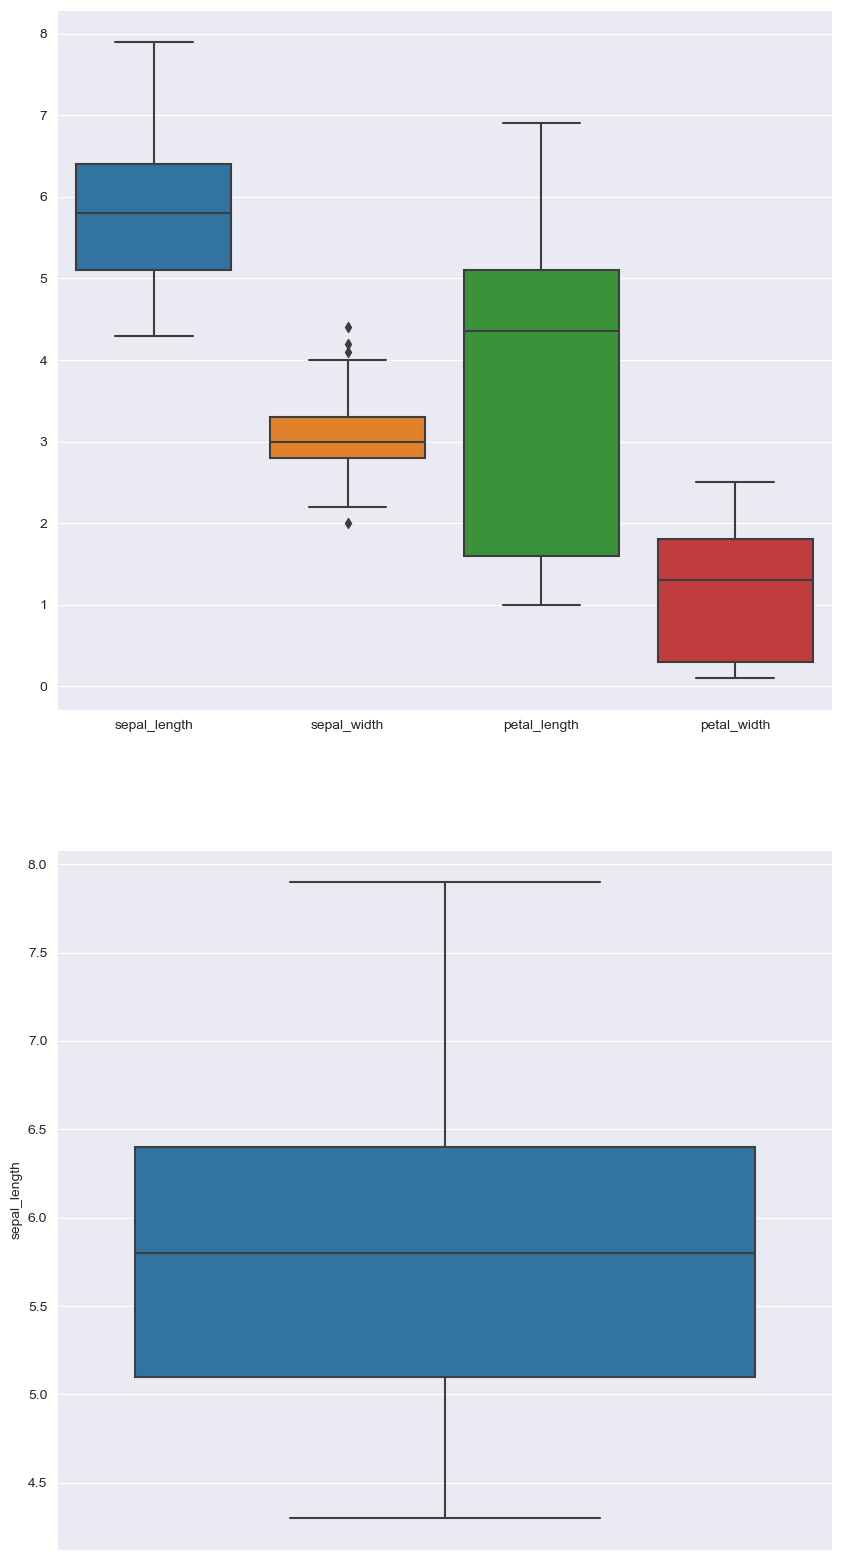

In [17]:
fig, axes = plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(10,20)
sns.boxplot(data=data,orient="v",ax=axes[0])
sns.boxplot(data=data,y="sepal_length",orient="species",ax=axes[1])

<Axes: ylabel='sepal_width'>

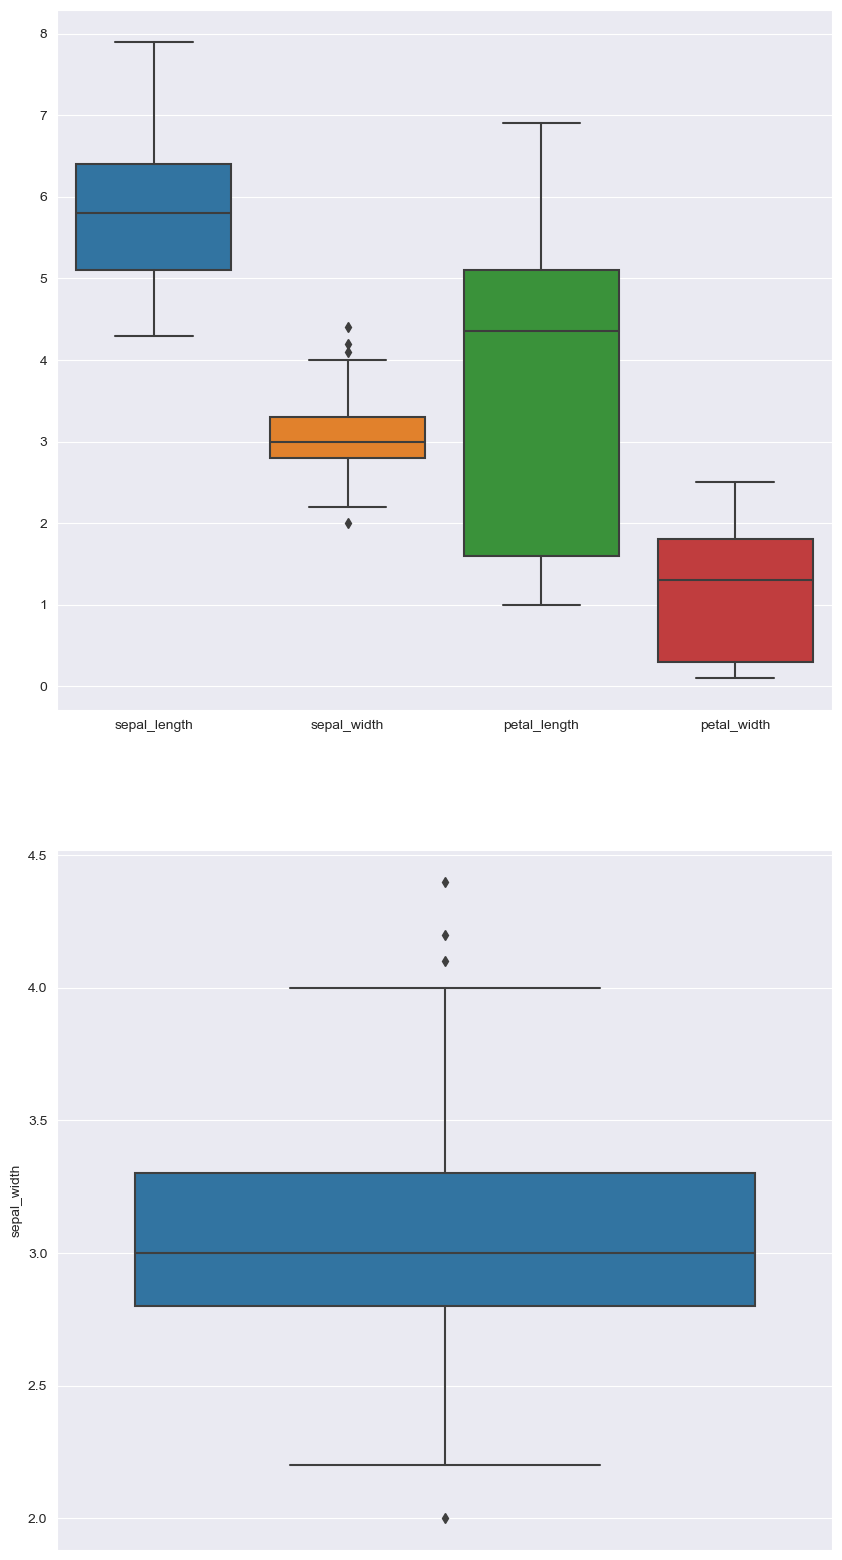

In [18]:
fig, axes = plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(10,20)
sns.boxplot(data=data,orient="v",ax=axes[0])
sns.boxplot(data=data,y="sepal_width",orient="species",ax=axes[1])

<Axes: ylabel='petal_length'>

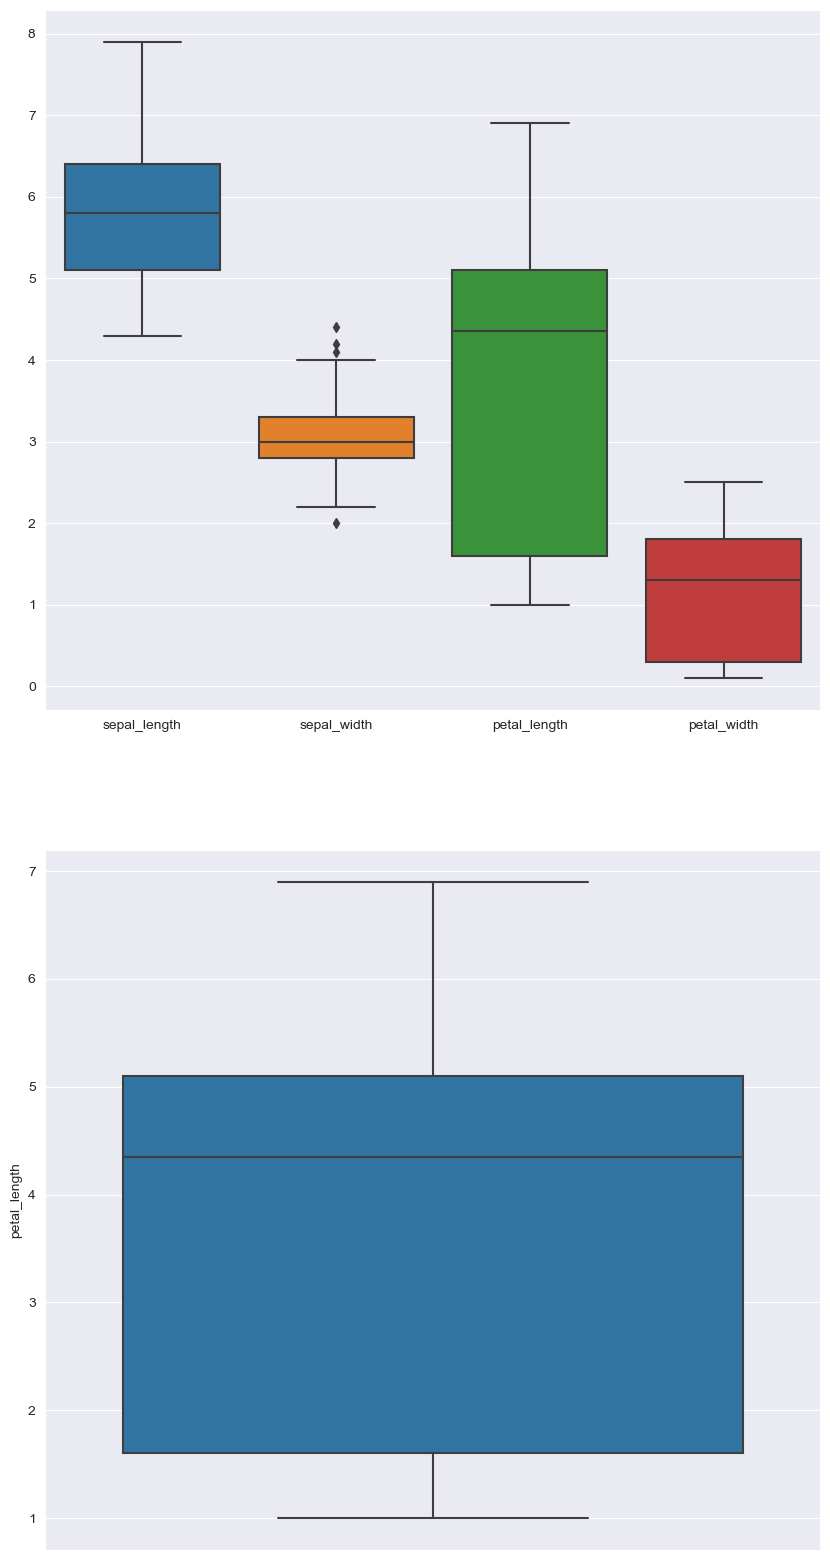

In [19]:
fig, axes = plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(10,20)
sns.boxplot(data=data,orient="v",ax=axes[0])
sns.boxplot(data=data,y="petal_length",orient="species",ax=axes[1])

<Axes: ylabel='petal_width'>

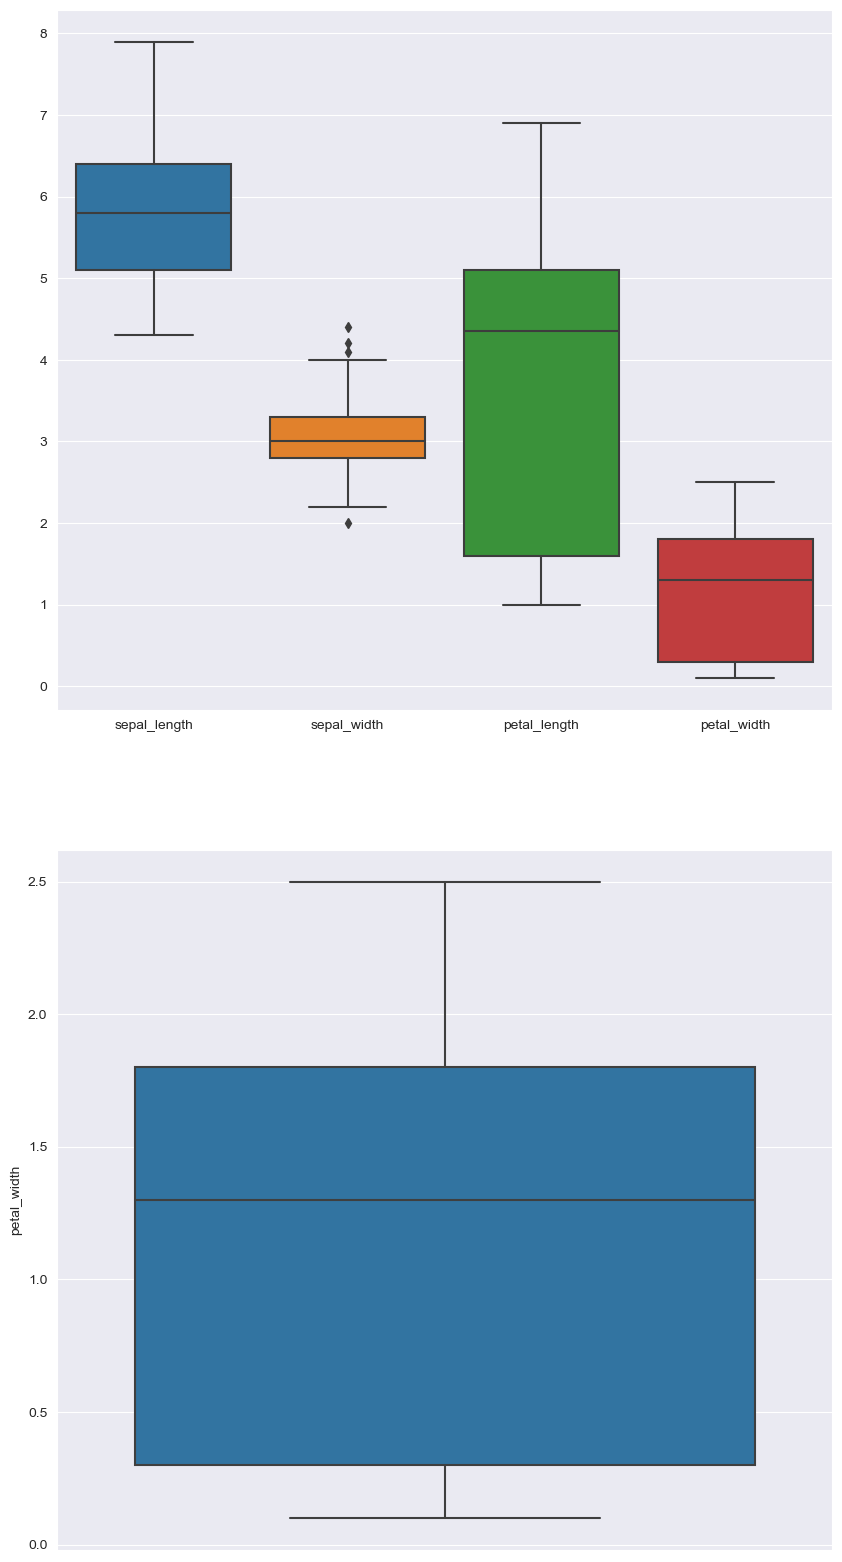

In [20]:
fig, axes = plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(10,20)
sns.boxplot(data=data,orient="v",ax=axes[0])
sns.boxplot(data=data,y="petal_width",orient="species",ax=axes[1])

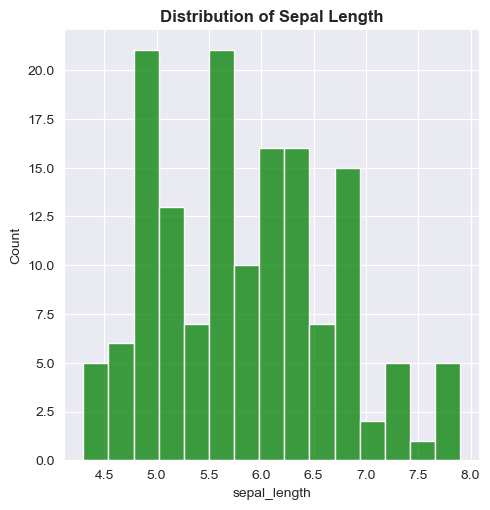

In [21]:
sns.displot(x=data["sepal_length"],bins=15,color="green")
data["sepal_length"].mean()
plt.title("Distribution of Sepal Length",fontweight="bold")
plt.show()

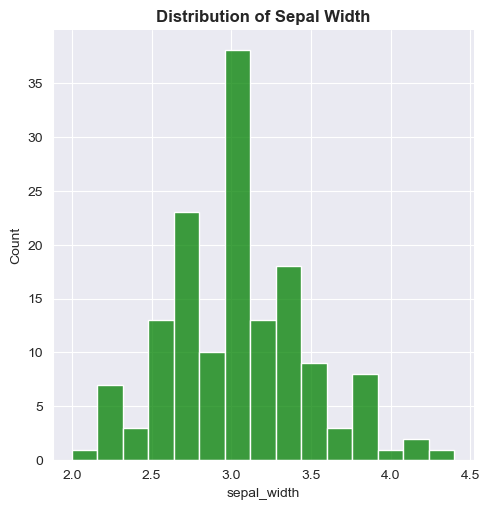

In [22]:
sns.displot(x=data["sepal_width"],bins=15,color="green")
data["sepal_width"].mean()
plt.title("Distribution of Sepal Width",fontweight="bold")
plt.show()

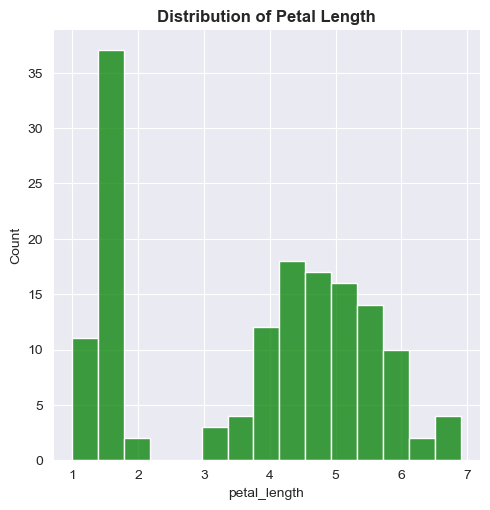

In [23]:
sns.displot(x=data["petal_length"],bins=15,color="green")
data["petal_length"].mean()
plt.title("Distribution of Petal Length",fontweight="bold")
plt.show()

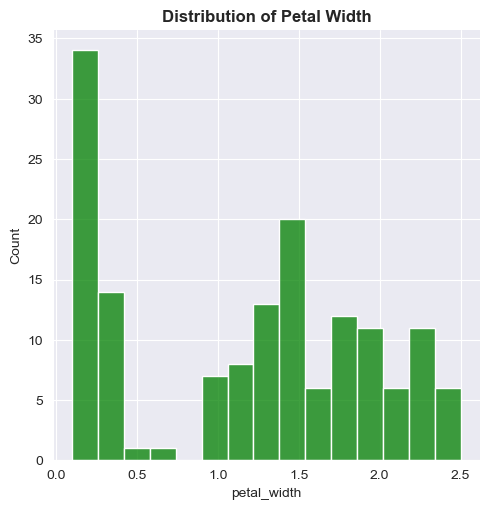

In [24]:
sns.displot(x=data["petal_width"],bins=15,color="green")
data["petal_width"].mean()
plt.title("Distribution of Petal Width",fontweight="bold")
plt.show()

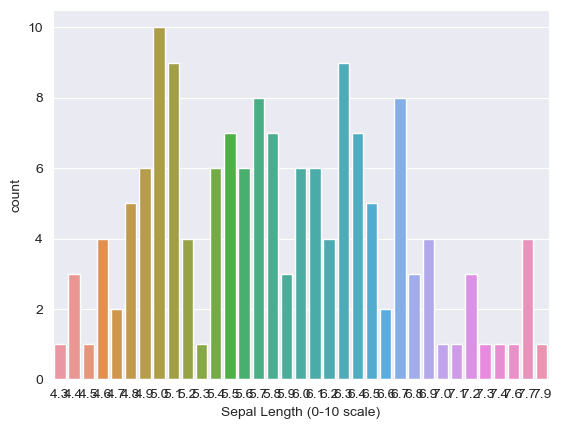

In [25]:
sns.countplot(x="sepal_length", data=data)
plt.xlabel("Sepal Length (0-10 scale)")
plt.show()

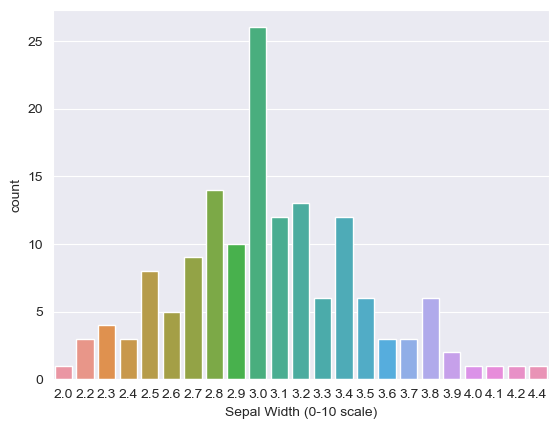

In [26]:
sns.countplot(x="sepal_width", data=data)
plt.xlabel("Sepal Width (0-10 scale)")
plt.show()

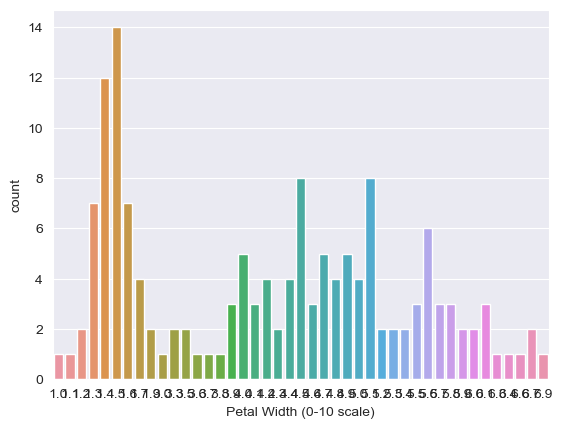

In [27]:
sns.countplot(x="petal_length", data=data)
plt.xlabel("Petal Width (0-10 scale)")
plt.show()

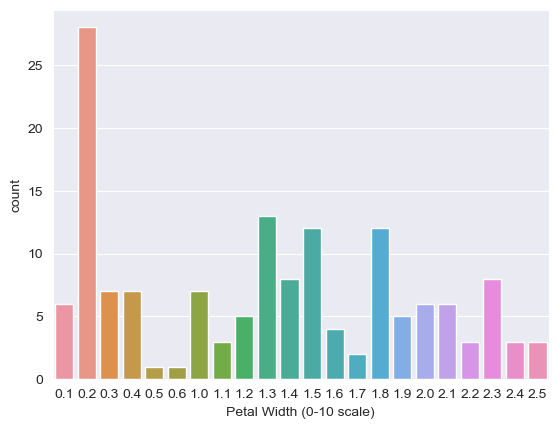

In [28]:
sns.countplot(x="petal_width", data=data)
plt.xlabel("Petal Width (0-10 scale)")
plt.show()

<Axes: xlabel='sepal_length', ylabel='species'>

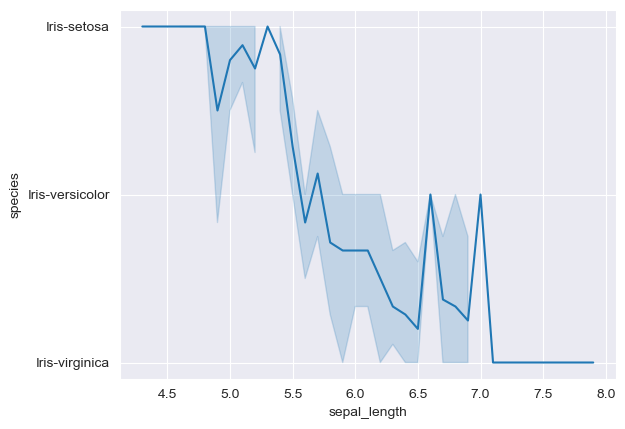

In [29]:
sns.lineplot(x=data["sepal_length"], y=data["species"])

<Axes: xlabel='sepal_width', ylabel='species'>

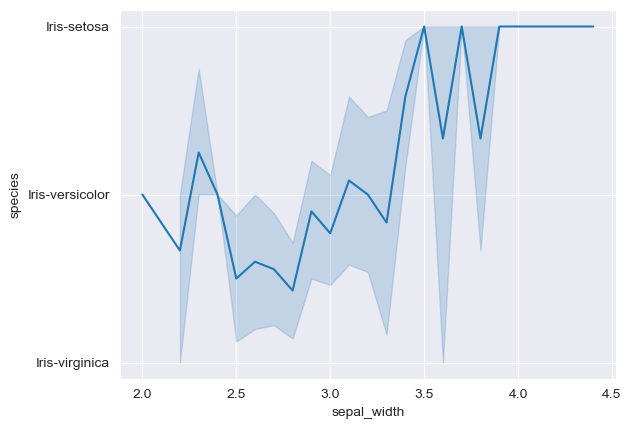

In [30]:
sns.lineplot(x=data["sepal_width"], y=data["species"])

<Axes: xlabel='petal_length', ylabel='species'>

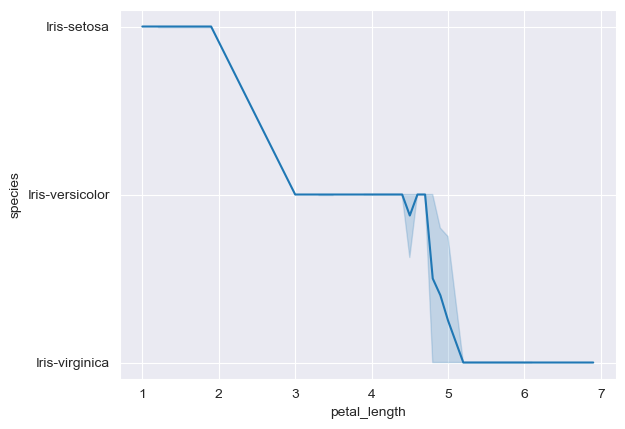

In [31]:
sns.lineplot(x=data["petal_length"], y=data["species"])

<Axes: xlabel='petal_width', ylabel='species'>

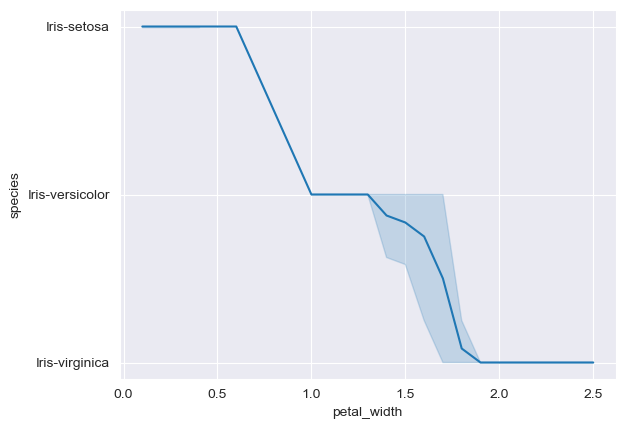

In [32]:
sns.lineplot(x=data["petal_width"], y=data["species"])

<Axes: xlabel='sepal_length', ylabel='Density'>

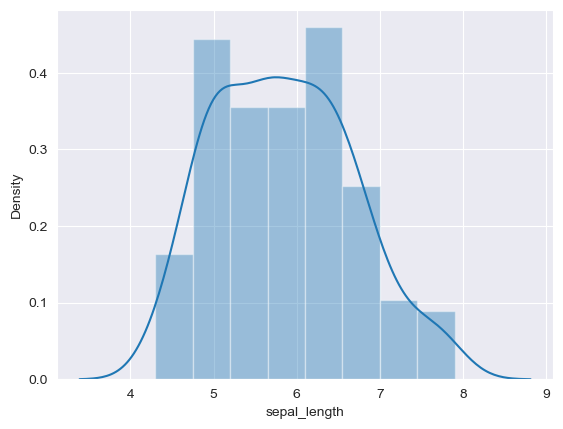

In [33]:
sns.distplot(data['sepal_length'])

<Axes: xlabel='sepal_width', ylabel='Density'>

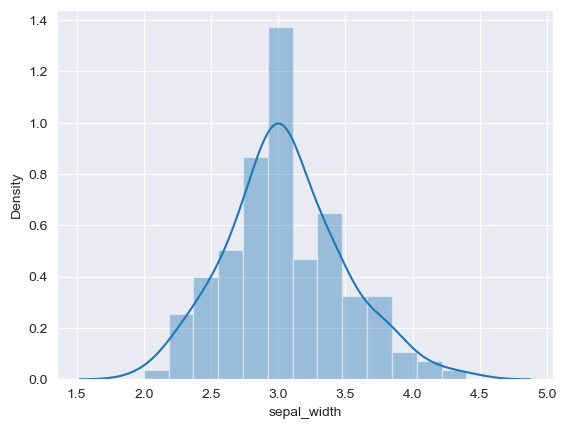

In [34]:
sns.distplot(data['sepal_width'])

<Axes: xlabel='petal_length', ylabel='Density'>

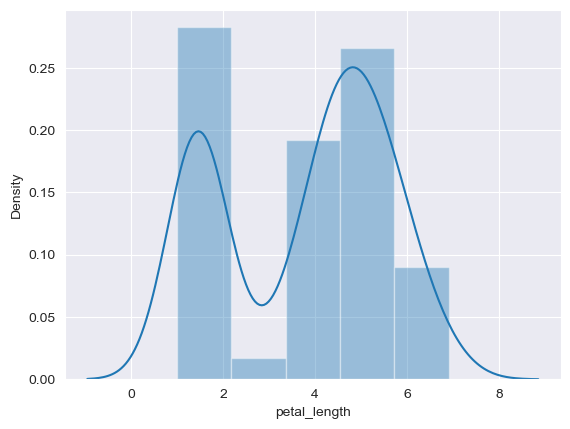

In [35]:
sns.distplot(data['petal_length'])

<Axes: xlabel='petal_width', ylabel='Density'>

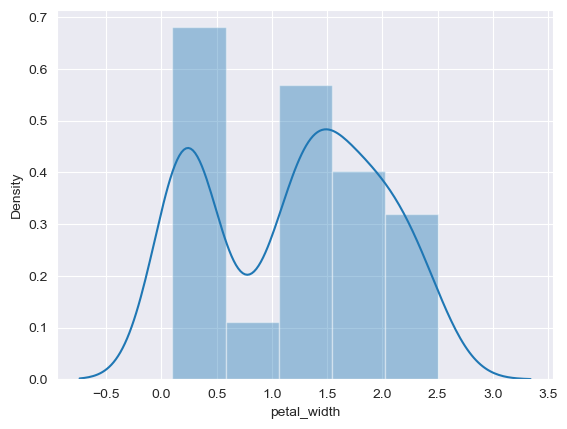

In [36]:
sns.distplot(data['petal_width'])

<Axes: >

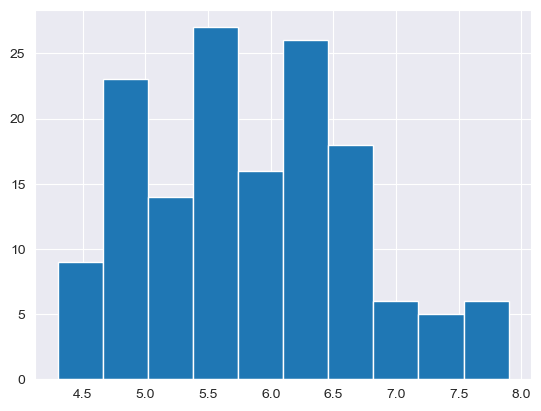

In [37]:
data['sepal_length'].hist()

<Axes: >

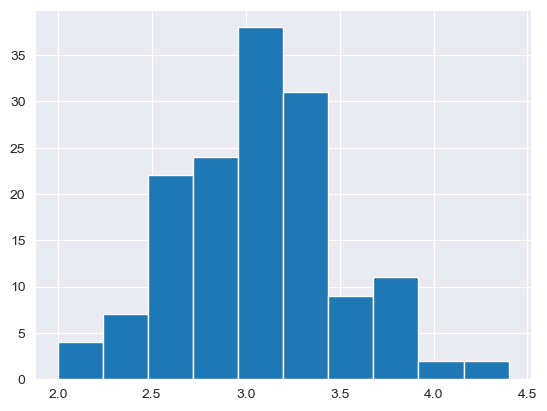

In [38]:
data['sepal_width'].hist()

<Axes: >

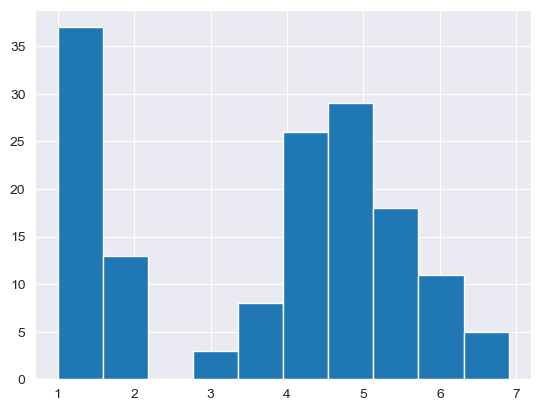

In [39]:
data['petal_length'].hist()

<Axes: >

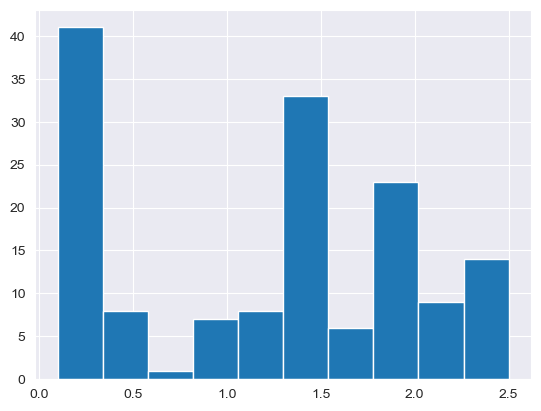

In [40]:
data['petal_width'].hist()

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

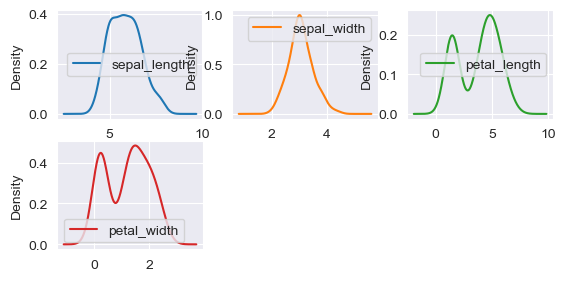

In [41]:
data.plot(kind ='density',subplots = True, layout =(3,3),sharex = False)

sepal_length       Axes(0.125,0.53;0.133621x0.35)
sepal_width     Axes(0.285345,0.53;0.133621x0.35)
petal_length     Axes(0.44569,0.53;0.133621x0.35)
petal_width     Axes(0.606034,0.53;0.133621x0.35)
dtype: object

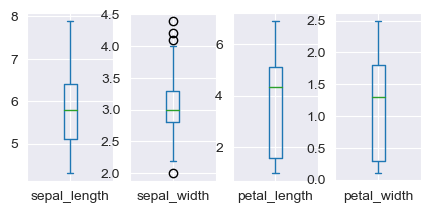

In [42]:
data.plot(kind ='box',subplots = True, layout =(2,5),sharex = False)

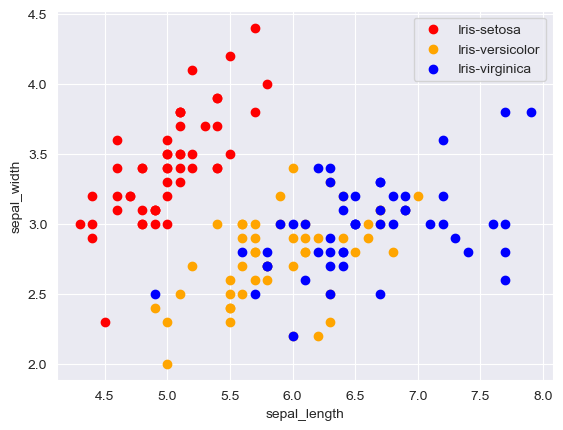

In [43]:
colors=['red','orange','blue']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']

for i in range(3):
    x=data[data['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()

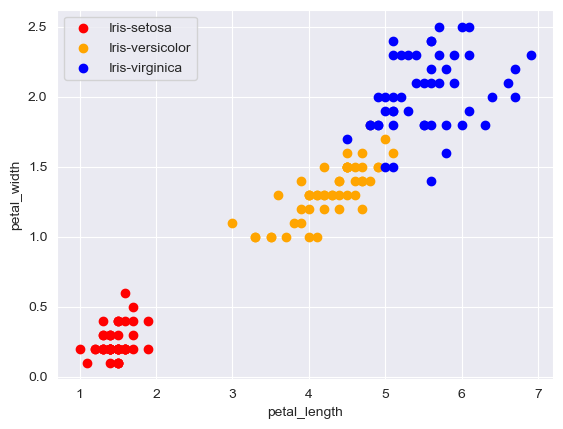

In [44]:
colors=['red','orange','blue']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']

for i in range(3):
    x=data[data['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()

<Axes: xlabel='species', ylabel='sepal_width'>

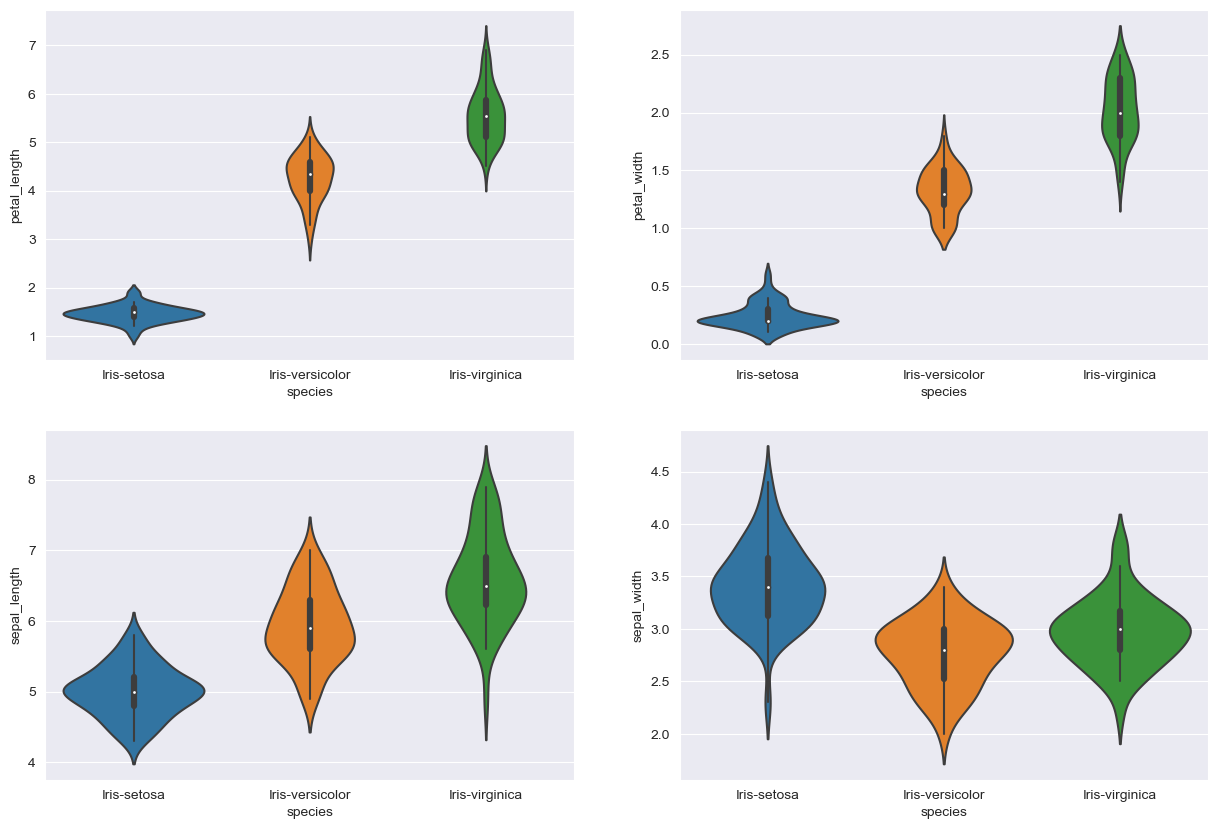

In [45]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=data)

In [46]:
n = len(data[data['species'] == 'Iris-versicolor'])
print("No of Versicolor in Dataset:",n)

n1 = len(data[data['species'] == 'Iris-virginica'])
print("No of Virginica in Dataset:",n1)

n2 = len(data[data['species'] == 'Iris-setosa'])
print("No of Setosa in Dataset:",n2)

No of Versicolor in Dataset: 50
No of Virginica in Dataset: 50
No of Setosa in Dataset: 50


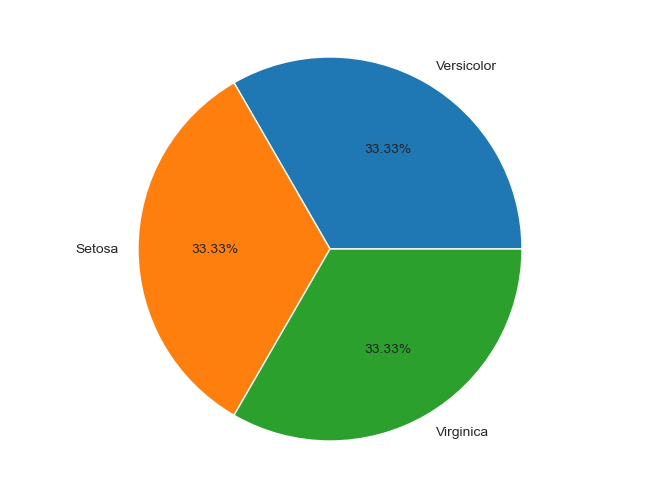

In [47]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

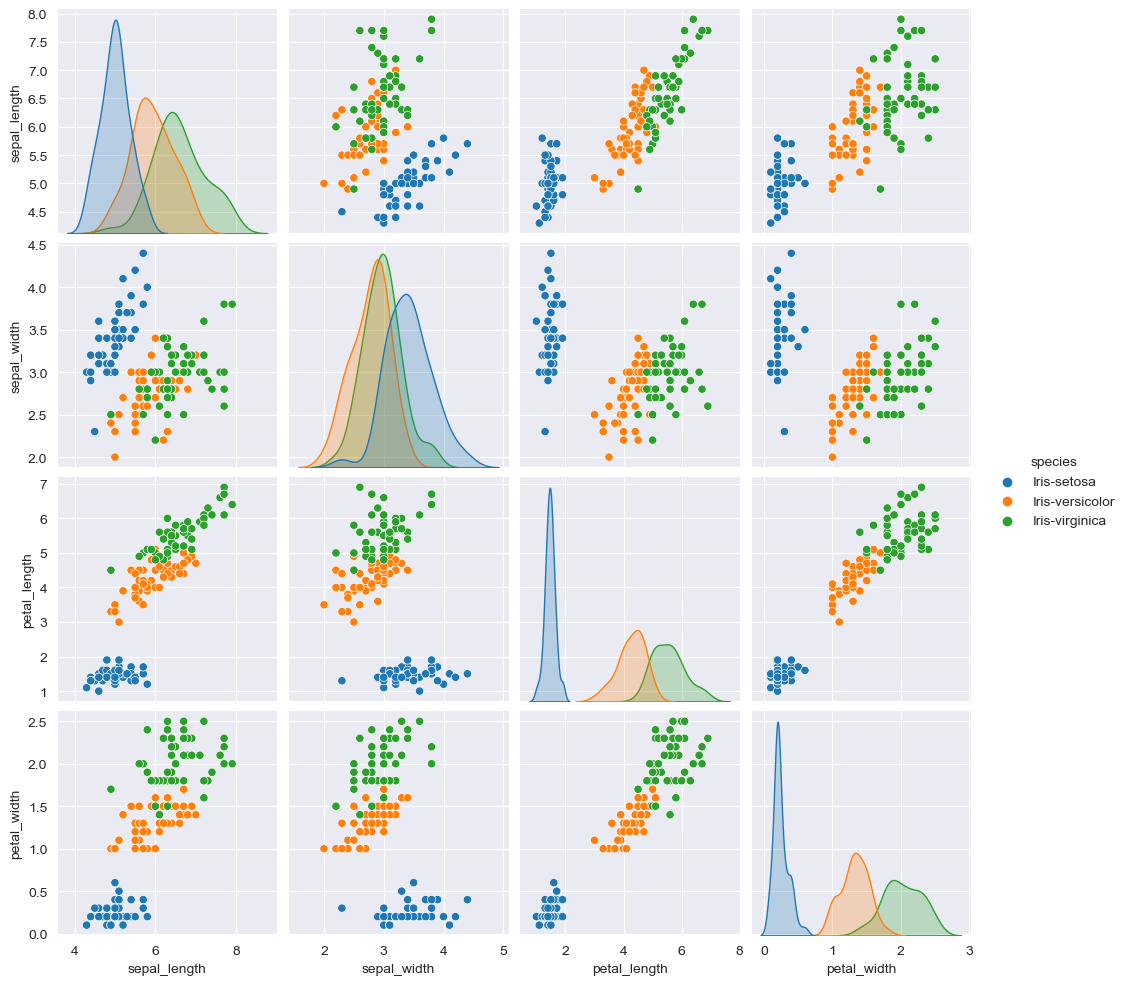

In [48]:
sns.pairplot(data,hue='species')

<Axes: >

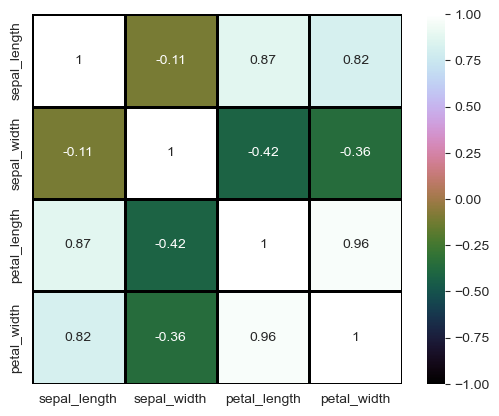

In [49]:
sns.heatmap(data [['sepal_length','sepal_width','petal_length','petal_width','species']].corr(),annot=True,cmap='cubehelix',
            linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1, cbar_kws={"orientation": "vertical"},cbar=True)

# Model Building

In [19]:
train, test = train_test_split(data, test_size = 0.25)
print(train.shape)
print(test.shape)

(112, 5)
(38, 5)


In [20]:
X_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
y_train = train[['species']]

X_test = test[['sepal_length','sepal_width','petal_length','petal_width']]
y_test = test[['species']]

In [21]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
5,5.4,3.9,1.7,0.4
3,4.6,3.1,1.5,0.2
139,6.9,3.1,5.4,2.1
89,5.5,2.5,4.0,1.3
55,5.7,2.8,4.5,1.3


In [22]:
y_test.head()

,species
52,Iris-versicolor
121,Iris-virginica
74,Iris-versicolor
83,Iris-versicolor
142,Iris-virginica


# Logistic Regression

In [23]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)
pred1 = model1.predict(X_test)
print('Accuracy:',accuracy_score(y_test,pred1))

Accuracy: 0.9736842105263158


In [24]:
confusion_mat = confusion_matrix(y_test,pred1)
print("Confusion matrix: \n",confusion_mat)
print(classification_report(y_test,pred1))

Confusion matrix: 
 [[12  0  0]
 [ 0 10  1]
 [ 0  0 15]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.94      1.00      0.97        15

       accuracy                           0.97        38
      macro avg       0.98      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38



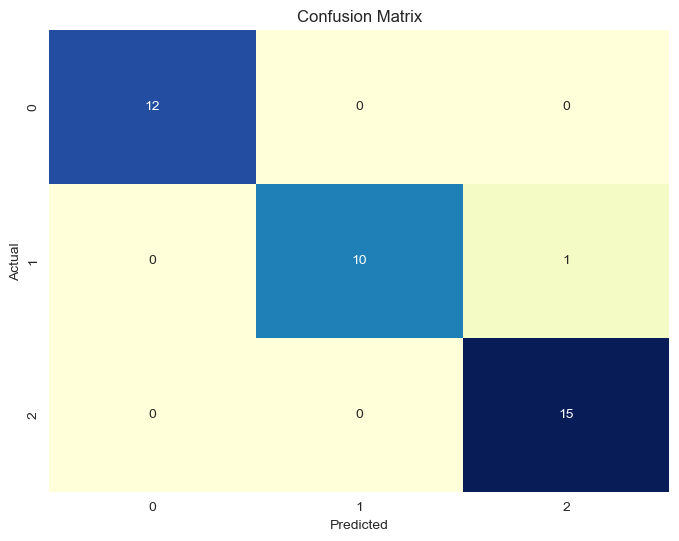

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, pred1), annot=True, cmap="YlGnBu", fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# KNN Classification

In [26]:
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train, y_train)
pred2 = model2.predict(X_test)
print('Accuracy:',accuracy_score(y_test,pred2))

Accuracy: 0.9736842105263158


# Support Vector Classification

In [27]:
model3 = SVC()
model3.fit(X_train, y_train)
pred3 = model3.predict(X_test)
print('Accuracy:',accuracy_score(y_test,pred3))

Accuracy: 0.9473684210526315


# Decision Tree

In [28]:
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(X_train, y_train)
pred4 = model4.predict(X_test)
print('Accuracy:',accuracy_score(y_test,pred4))

Accuracy: 0.9736842105263158


# Naive Bayes

In [29]:
model5 = GaussianNB()
model5.fit(X_train, y_train)
pred5 = model5.predict(X_test)
print('Accuracy:',accuracy_score(y_test,pred5))

Accuracy: 0.9736842105263158


In [30]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN','Support Vector Machines','Decision Tree','Naive Bayes'],
    'Score': [0.973,0.973,0.947,0.973,0.973]})

result_data = results.sort_values(by='Score', ascending=False)
result_data = result_data.set_index('Score')
result_data.head(9)

,Model
Score,
0.973,Logistic Regression
0.973,KNN
0.973,Decision Tree
0.973,Naive Bayes
0.947,Support Vector Machines


In [22]:
sepal_length = float(input("Enter Sepal Length: "))
sepal_width = float(input("Enter Sepal Width: "))
petal_length = float(input("Enter Petal Length: "))
petal_width = float(input("Enter Petal Width: "))

# Standardize the user input
user_input = scaler.transform([[sepal_length, sepal_width, petal_length, petal_width]])

# Predict the species
predicted_species = model2.predict(user_input)

print(f"Predicted species: {predicted_species[0]}")

Enter Sepal Length: 5.1
Enter Sepal Width: 3.5
Enter Petal Length: 1.4
Enter Petal Width: 0.2
Predicted species: Iris-setosa
